In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
print('setup done - ok')

setup done - ok


In [ ]:
df = pd.read_csv('/content/medical_examination.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df['overweight'] = (df['weight'] / (df['height']/100)**2)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [ ]:
df.loc[df['overweight'] <= 25, 'overweight'] = 0 
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.000000
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.000000
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.000000


In [ ]:
df.loc[df['overweight'] > 25, 'overweight'] = 1
df.head()

#Alternative way to convert 0 and 1 
# df['overweight'] = (df['weight'] / (df['height']/100)**2).apply(lambda a: 1 if a>25 else 0)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0


In [ ]:
df['cholesterol'].value_counts(), df['gluc'].value_counts()

(1    52385
 2     9549
 3     8066
 Name: cholesterol, dtype: int64, 1    59479
 3     5331
 2     5190
 Name: gluc, dtype: int64)

In [ ]:
df['cholesterol'].unique(), df['gluc'].unique()

(array([1, 3, 2]), array([1, 2, 3]))

In [ ]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0.0
5,8,21914,1,151,67.0,120,80,1,2,0,0,0,0,1.0
6,9,22113,1,157,93.0,130,80,1,1,0,0,1,0,1.0
7,12,22584,2,178,95.0,130,90,1,3,0,0,1,1,1.0
8,13,17668,1,158,71.0,110,70,0,1,0,0,1,0,1.0
9,14,19834,1,164,68.0,110,60,0,1,0,0,0,0,1.0


In [ ]:
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df['overweight'] = df['overweight'].astype('int32')
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,1,1,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,0,0,0,0,0,0,1


In [ ]:
df1 = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'alco', 'active', 'smoke', 'overweight'])
df1

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [ ]:
df1['total'] = 1
df1_grp = df1.groupby(by = ['cardio', 'variable','value'], as_index=False).count()
df1_grp

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


In [ ]:
# df1.groupby(by = ['cardio', 'variable','value'], as_index=False).count() #Alternative

seaborn.axisgrid.FacetGrid

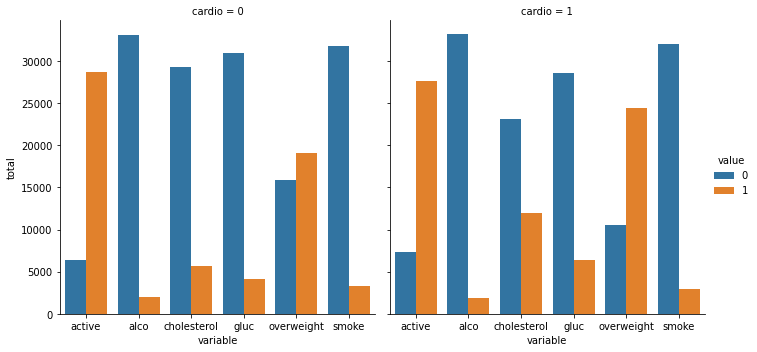

In [ ]:
g = sns.catplot(x='variable', y='total', hue='value', kind='bar', col='cardio', data=df1_grp)
fig = g.fig
fig.savefig('catplot.jpg')
type(g) #catplot() returns facet grid object | so fig obj needs to accessed manually by facetgrid_obj.fig

In [ ]:
df_cln = df.loc[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

In [ ]:
df_cln

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [ ]:
corr = df_cln.corr(method='pearson')

In [ ]:
utrimask = np.triu(corr)

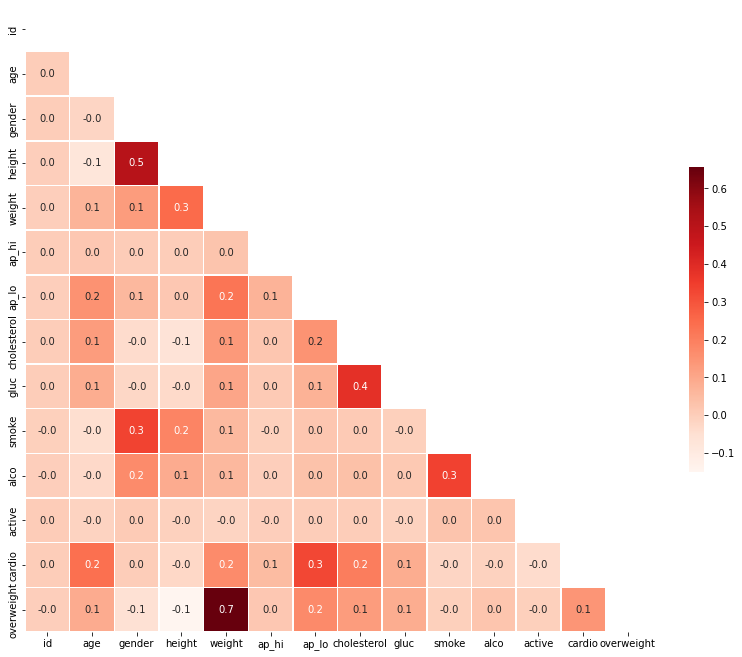

In [ ]:
plt.figure(figsize=(14,14))
fig = sns.heatmap(data=corr, mask=utrimask, annot=True, cmap='Reds', linewidths=.5, fmt='.1f', square=True, cbar_kws={"shrink": .4})
plt.savefig('heatmap.png')
# type(fig)